In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results_gsmax = pd.read_csv("evaluation/test_gs_max_int_emb/results.csv")
results_astactic = pd.read_csv("evaluation/test_astactic/results.csv")
analysis = pd.read_csv("stats.csv")

In [5]:
results_gsmax['model'], results_astactic['model'] = 'gsmax', 'astactic'
results = pd.concat([results_gsmax, results_astactic], ignore_index=True, axis=0)
# df = pd.merge(results, analysis, on=["lib", "project", "proof"])
# df.columns

In [67]:
df_gsmax = pd.merge(results_gsmax, analysis, on=["lib", "project", "proof"])
df_astactic = pd.merge(results_astactic, analysis, on=["lib", "project", "proof"])
df_astactic.head(10)

,project,lib,proof,success,num_tactics,time,model,apply,assumption,auto,...,ring,simpl,simple_induction,specialize,split,subst,symmetry,tauto,trivial,unfold
0,buchberger,Pcomb.json,CombLinear_canonical,False,300,30.333373,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,buchberger,Pcomb.json,CombLinear_comp,False,300,31.475386,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,buchberger,Pcomb.json,CombLinear_pluspf,False,300,30.846230,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,buchberger,Pcomb.json,CombLinear_mults1,False,300,30.633649,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,buchberger,Pcomb.json,CombLinear_minuspf,False,300,25.485140,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,buchberger,Pcomb.json,CombLinear_id,False,300,25.043488,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,buchberger,Pcomb.json,CombLinear_spoly,False,300,78.655344,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,buchberger,Pcomb.json,CombLinear_reduce,False,300,27.852982,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,buchberger,Pcomb.json,CombLinear_reduceplus,False,300,31.986653,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,buchberger,Pcomb.json,CombLinear_reducestar,False,300,32.069848,astactic,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_astactic.columns

Index(['project', 'lib', 'proof', 'success', 'num_tactics', 'time', 'model',
       'apply', 'assumption', 'auto', 'case', 'cbn', 'cbv', 'clear',
       'congruence', 'constructor', 'contradict', 'destruct', 'discriminate',
       'easy', 'eauto', 'elim', 'exact', 'exfalso', 'exists', 'f_equal',
       'field', 'generalize', 'height_p1', 'height_p100', 'height_p25',
       'height_p50', 'height_p75', 'height_p99', 'hnf', 'idtac', 'induction',
       'intro', 'intuition', 'inversion', 'inversion_clear', 'left', 'lia',
       'n_steps', 'nodes_p1', 'nodes_p100', 'nodes_p25', 'nodes_p50',
       'nodes_p75', 'nodes_p99', 'omega', 'red', 'reflexivity', 'revert',
       'rewrite', 'right', 'ring', 'simpl', 'simple_induction', 'specialize',
       'split', 'subst', 'symmetry', 'tauto', 'trivial', 'unfold'],
      dtype='object')

# Overall comparison by library

In [72]:
print((df_astactic['success'] == True).astype(int).sum())
print((df_gsmax['success'] == True).astype(int).sum())

1327
1580


In [90]:
df_project.index.tolist()

['PolTac',
 'UnifySL',
 'angles',
 'buchberger',
 'chinese',
 'coq-procrastination',
 'coqoban',
 'coqrel',
 'coquelicot',
 'dblib',
 'demos',
 'dep-map',
 'disel',
 'fermat4',
 'fundamental-arithmetics',
 'goedel',
 'hoare-tut',
 'huffman',
 'jordan-curve-theorem',
 'tree-automata',
 'verdi',
 'verdi-raft',
 'weak-up-to',
 'zchinese',
 'zfc',
 'zorns-lemma']

In [100]:
def compare_bar_charts(df, col1, col2):
    plt.figure()
    x_axis = np.arange(len(df))
    y1, y2 = df[col1], df[col2]
    plt.bar(x_axis - 0.2, y1, 0.4, label = col1)
    plt.bar(x_axis + 0.2, y2, 0.4, label = col2)
    plt.xticks(x_axis, df_project.index.tolist(), rotation=45, ha='right')
    plt.legend()

In [101]:
# rows = project names; columns = model_success_count, total_proofs, model_success_pct
# groupby on project name
cols = ['project', 'success_count', 'proof_count']
df_astactic['success_count'] = (df_astactic['success'] == True).astype(int)
df_gsmax['success_count'] = (df_gsmax['success'] == True).astype(int)
df_astactic['proof_count'], df_gsmax['proof_count'] = 1, 1

df1_project = df_astactic[cols].groupby(['project']).sum()
df2_project = df_gsmax[cols].groupby(['project']).sum()

df1_project['success_pct'] = df1_project['success_count'] / df1_project['proof_count']
df2_project['success_pct'] = df2_project['success_count'] / df2_project['proof_count']

df1_project = df1_project.add_prefix('astactic_')
df2_project = df2_project.add_prefix('gsmax_')
df_project = df1_project.merge(df2_project, how='left', on='project')
df_project = df_project.sort_values(by='gsmax_success_pct', ascending=False)
df_project

,astactic_success_count,astactic_proof_count,astactic_success_pct,gsmax_success_count,gsmax_proof_count,gsmax_success_pct
project,,,,,,
demos,50,68,0.735294,53.0,68.0,0.779412
coqrel,184,256,0.718750,194.0,256.0,0.757812
coq-procrastination,5,8,0.625000,5.0,8.0,0.625000
PolTac,118,363,0.325069,118.0,363.0,0.325069
dblib,40,180,0.222222,45.0,180.0,0.250000
dep-map,9,43,0.209302,9.0,43.0,0.209302
chinese,31,131,0.236641,26.0,131.0,0.198473
zfc,35,237,0.147679,43.0,237.0,0.181435
UnifySL,188,968,0.194215,167.0,968.0,0.172521


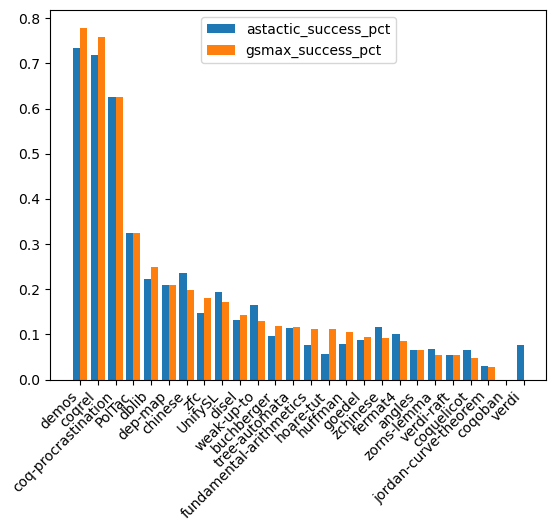

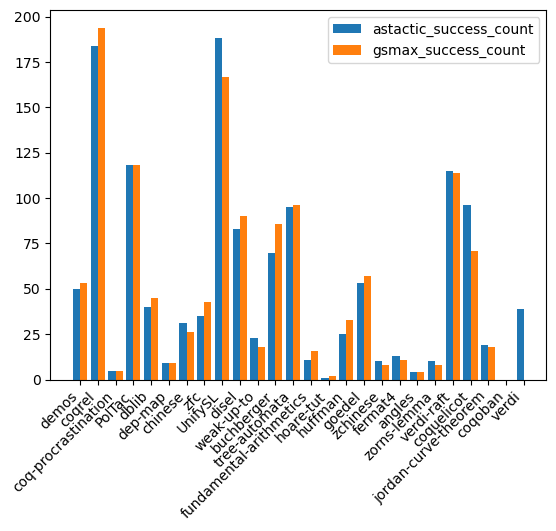

In [103]:
compare_bar_charts(df_project, col1='astactic_success_pct', col2='gsmax_success_pct')
compare_bar_charts(df_project, col1='astactic_success_count', col2='gsmax_success_count')

# Histogram Plots

In [12]:
def plot_hist(df, col, success, quantile):
    plt.figure()
    df = df[df["success"] == success]
    df = df[col]
    mean = df.mean()
    df = df[df < df.quantile(quantile)]
    df.hist(bins=min(100, len(df.unique())), label="count")
    plt.axvline(mean, color="red", label=f"mean = {mean:.2f}")
    plt.legend()
    plt.title(f"{col} (success={success}, quantile={quantile})")

In [38]:
def compare_hist_plot(df1, df2, df1_name, df2_name, col, success, quantile):
    fig, axes = plt.subplots(1, 2)

    df1 = df1[df1["success"] == success]
    df2 = df2[df2["success"] == success]
    df1, df2 = df1[col], df2[col]
    
    mean1, mean2 = df1.mean(), df2.mean()
    df1 = df1[df1 < df1.quantile(quantile)]
    df2 = df2[df2 < df2.quantile(quantile)]
    
    df1.hist(bins=min(100, len(df1.unique())), label="count", ax=axes[0])
    df2.hist(bins=min(100, len(df2.unique())), label="count", ax=axes[1])
    
    axes[0].set_title(df1_name); axes[1].set_title(df2_name)
    axes[0].axvline(mean1, color="red", label=f"mean = {mean1:.2f}")
    axes[1].axvline(mean2, color="red", label=f"mean = {mean2:.2f}")
    axes[0].legend(); axes[1].legend()
    
    fig.suptitle(f"{col} (success={success}, quantile={quantile})")

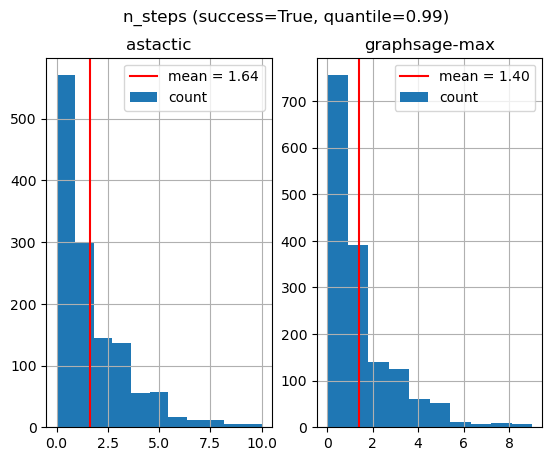

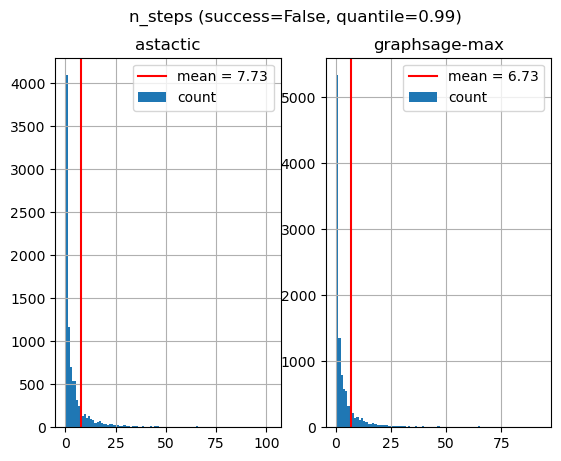

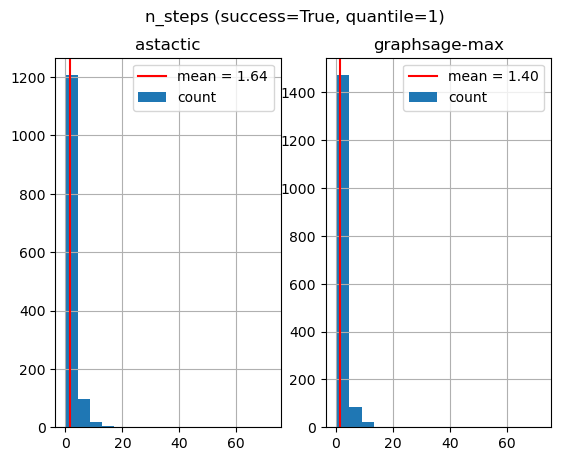

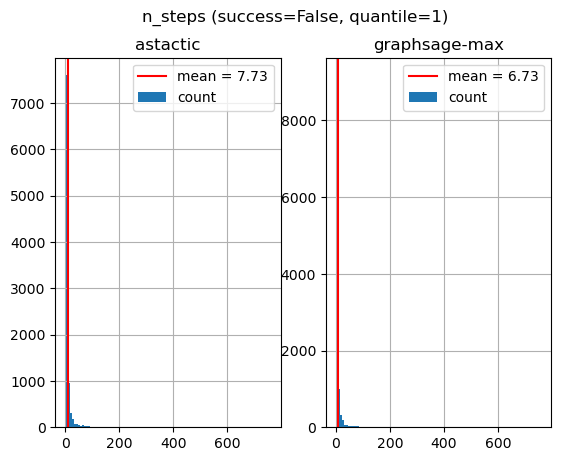

In [39]:
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "n_steps", True, 0.99)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "n_steps", False, 0.99)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "n_steps", True, 1)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "n_steps", False, 1)

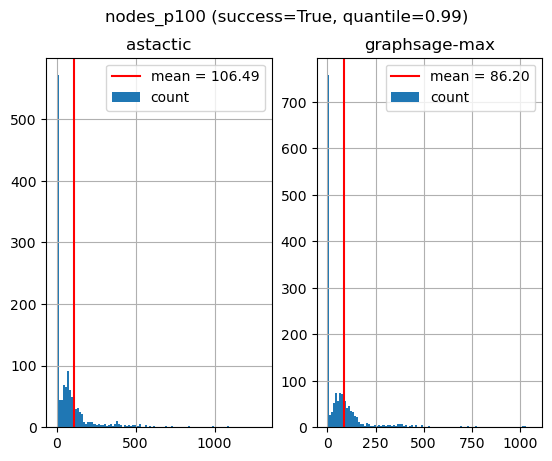

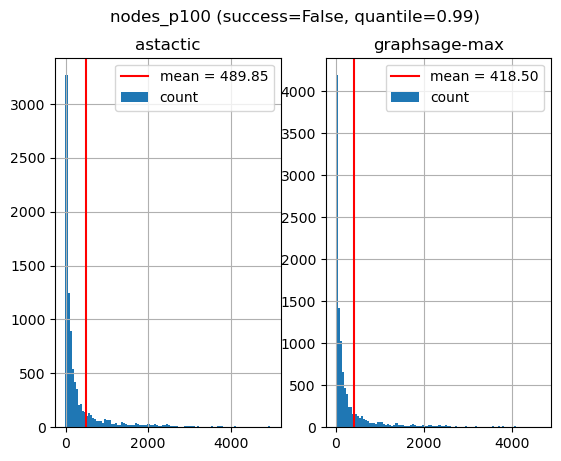

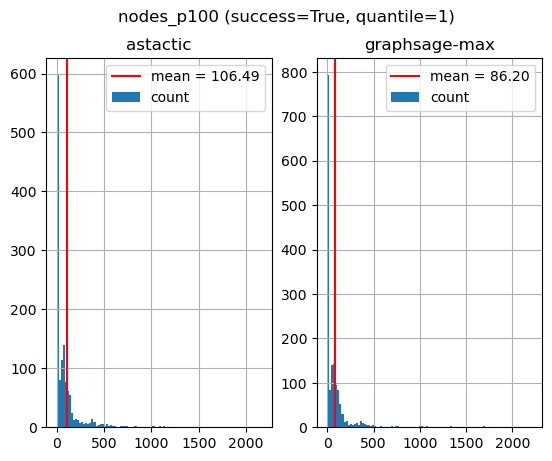

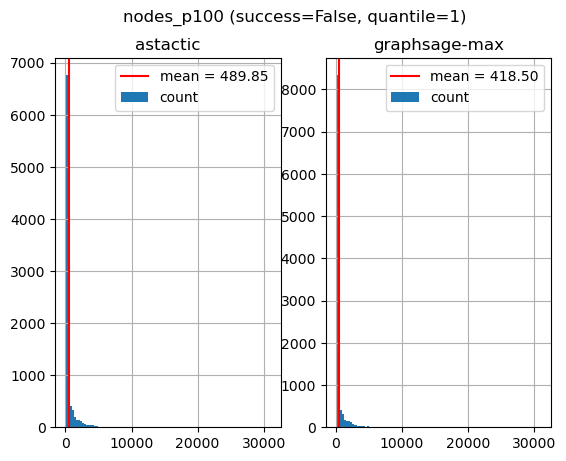

In [40]:
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "nodes_p100", True, 0.99)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "nodes_p100", False, 0.99)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "nodes_p100", True, 1)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "nodes_p100", False, 1)

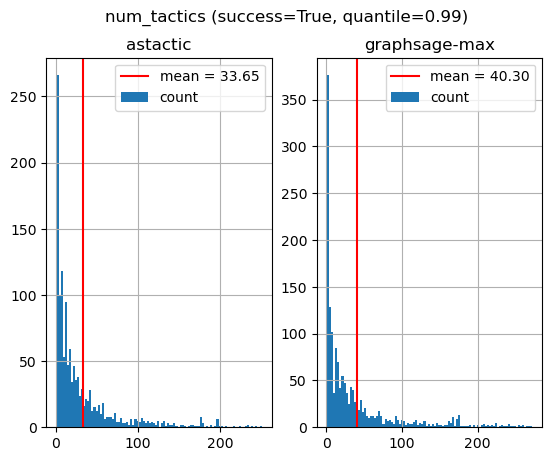

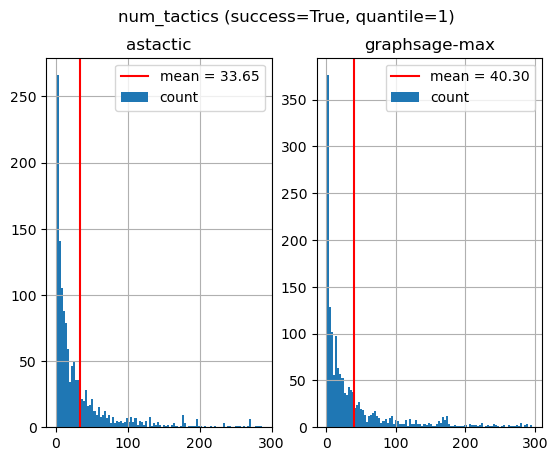

In [46]:
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "num_tactics", True, 0.99)
compare_hist_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "num_tactics", True, 1)

# Scatter Plots

In [15]:
def plot_scatter(df, xcol, ycol, quantile):
    plt.figure()
    df = df[[xcol, ycol, 'success']]
    df = df[df[xcol] < df[xcol].quantile(quantile)]
    df = df[df[ycol] < df[ycol].quantile(quantile)]
    plt.scatter(df[df['success'] == False][xcol], df[df['success'] == False][ycol], c='red', label='success = False')
    plt.scatter(df[df['success'] == True][xcol], df[df['success'] == True][ycol], c='blue', label='success = True')
    plt.legend()
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"{xcol} vs {ycol} (quantile={quantile})")

In [44]:
def compare_scatter_plot(df1, df2, df1_name, df2_name, xcol, ycol, quantile):
    fig, axes = plt.subplots(1, 2)

    df1 = df1[[xcol, ycol, 'success']]
    df2 = df2[[xcol, ycol, 'success']]
    
    df1 = df1[df1[xcol] < df1[xcol].quantile(quantile)]
    df1 = df1[df1[ycol] < df1[ycol].quantile(quantile)]
    df2 = df2[df2[xcol] < df2[xcol].quantile(quantile)]
    df2 = df2[df2[ycol] < df2[ycol].quantile(quantile)]
    
    axes[0].scatter(df1[df1['success'] == False][xcol], df1[df1['success'] == False][ycol], c='red', label='success = False')
    axes[0].scatter(df1[df1['success'] == True][xcol], df1[df1['success'] == True][ycol], c='blue', label='success = True')
    axes[1].scatter(df2[df2['success'] == False][xcol], df2[df2['success'] == False][ycol], c='red', label='success = False')
    axes[1].scatter(df2[df2['success'] == True][xcol], df2[df2['success'] == True][ycol], c='blue', label='success = True')
    
    axes[0].set_title(df1_name); axes[1].set_title(df2_name)
    axes[0].set_ylabel(ycol); axes[0].set_xlabel(xcol)
    axes[1].set_ylabel(ycol); axes[1].set_xlabel(xcol)
    axes[0].legend(); axes[1].legend()
    plt.suptitle(f"{xcol} vs {ycol} (quantile={quantile})")

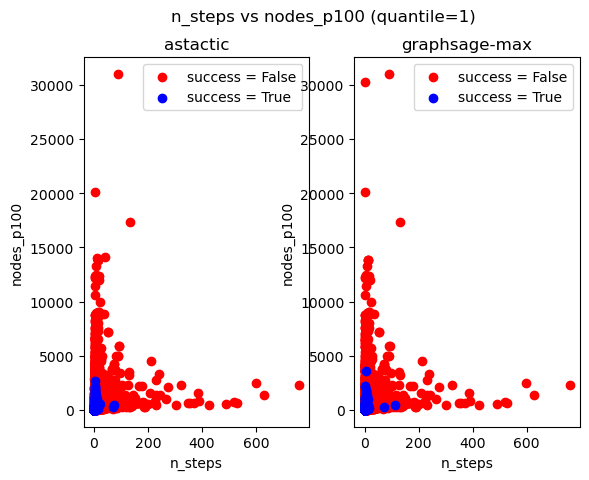

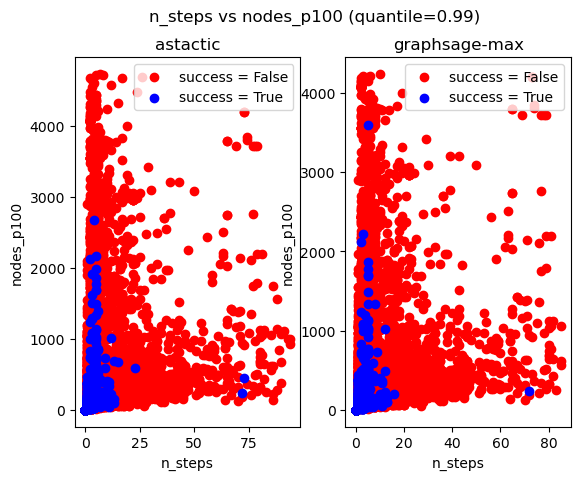

In [45]:
compare_scatter_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "n_steps", "nodes_p100", 1)
compare_scatter_plot(df_astactic, df_gsmax, "astactic", "graphsage-max", "n_steps", "nodes_p100", 0.99)